# Assignment 3 Overview
In this assignment, we are asked to explore the California Housing dataset using various techniques, including Principal Component Analysis (PCA), clustering, and supervised learning algorithms.
The goal is to analyze and model housing prices in California based on different features.

In [1]:
from pathlib import Path
import pandas as pd

dataset = pd.read_csv(Path("housingCalifornia.csv"))

In [2]:
dataset

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,oceanProximity,medianHouseValue
0,-122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409,741,349,1.8672,INLAND,84700


# Reading the dataset

## D1

In [3]:
# Configuration for saving images
# Reference: https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(
    fig_id,
    tight_layout=True,
    fig_extension="png",
    resolution=300,
    bbox_inches="tight",
    pad_inches=0.3,
    **kwargs,
):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(
        path,
        format=fig_extension,
        dpi=resolution,
        bbox_inches=bbox_inches,
        pad_inches=pad_inches,
        **kwargs,
    )

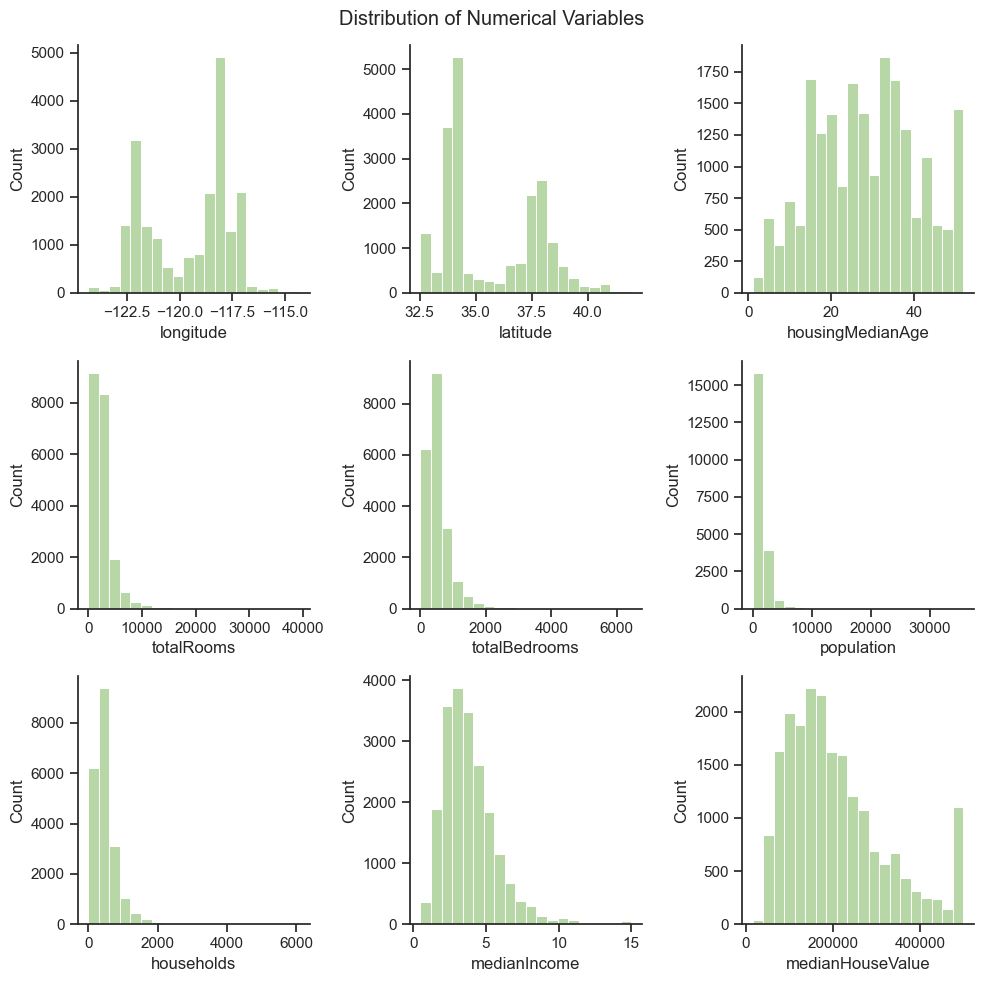

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
my_cmap = plt.get_cmap("crest")

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
numerical_data = dataset.drop(columns=["oceanProximity"])

# ? Should we scale the data?

for i, ax in enumerate(axes.flat):
    sns.histplot(
        data=numerical_data,
        x=numerical_data.columns[i],
        # log_scale=True,
        bins=20,
        ax=ax,
        alpha=0.8,
        color=my_cmap.colors[0],
        edgecolor="white",
    )
    # ax.set_title(numerical_data.columns[i])

fig.suptitle("Distribution of Numerical Variables")
save_fig("d1_a")

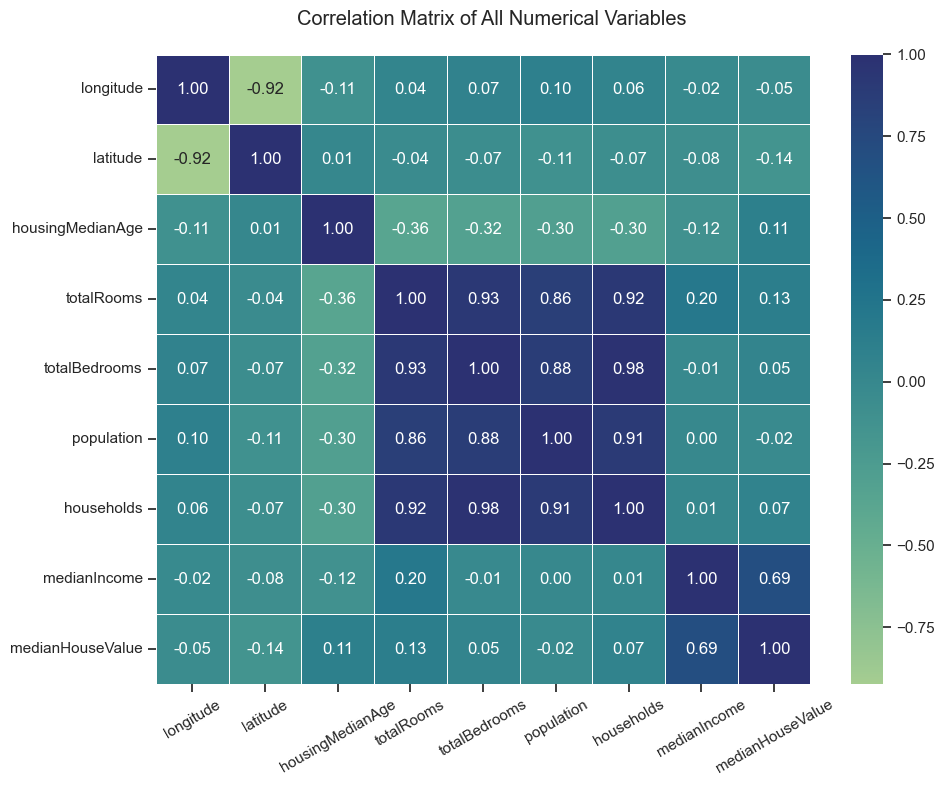

In [5]:
# https://courses.engr.illinois.edu/cs357/fa2019/assets/demos/upload/CA10-ML/Breast-cancer-data.html


# correlation matrix
def plot_correlation_heatmap(X: pd.DataFrame):
    """
    plot correlations of the different variables

    args:
        X (pd.DataFrame): a dataframe of the independent variables

    returns:
        a heatmap of the correlation
    """
    corrmat = X.corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.suptitle("Correlation Matrix of All Numerical Variables")
    sns.heatmap(corrmat, annot=True, linewidths=0.5, fmt=".2f", ax=ax, cmap=my_cmap)
    plt.xticks(rotation=30)


plot_correlation_heatmap(numerical_data)
save_fig("d1_b")

In [6]:
target = dataset.iloc[:, -1].to_frame()
data = dataset.drop(columns=["medianHouseValue"])

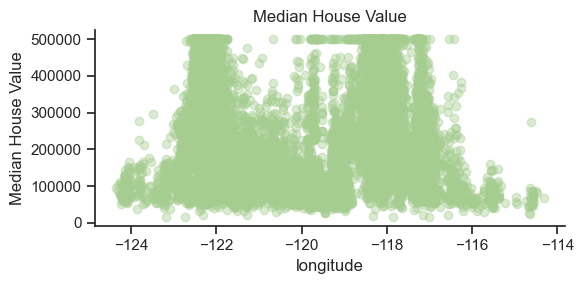

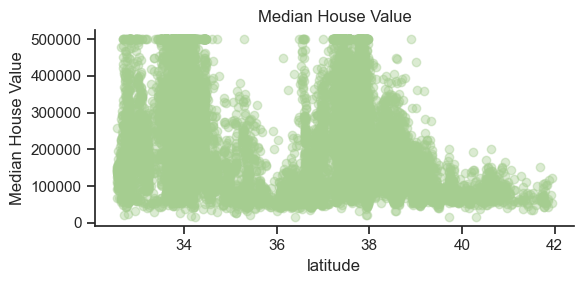

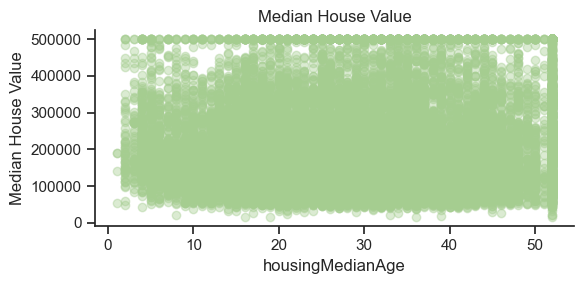

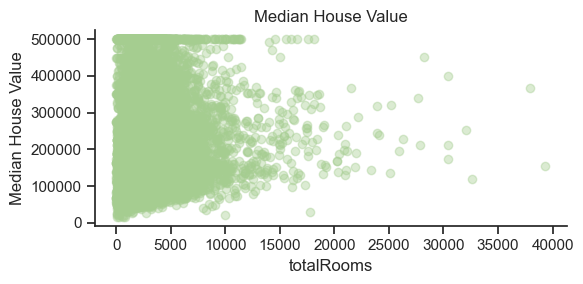

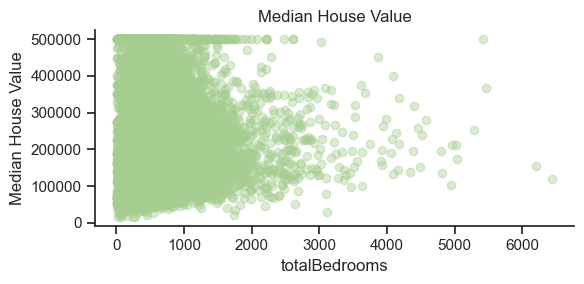

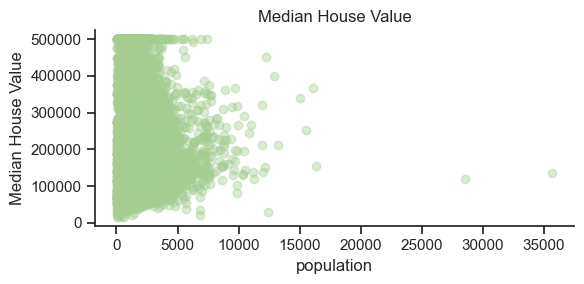

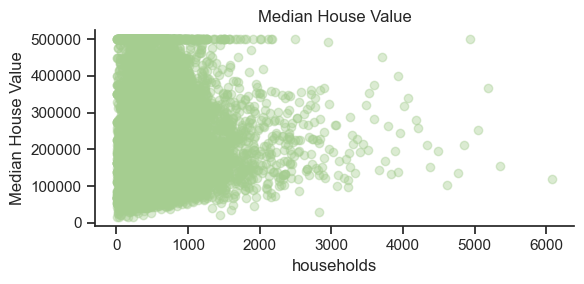

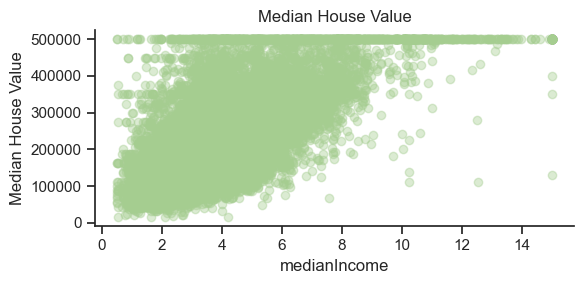

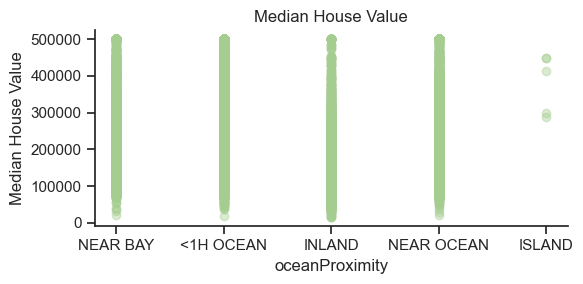

In [10]:
def plot_scatter(data, target, ylabel, i):
    fig, ax = plt.subplots(figsize=(6, 3))
    plt.scatter(data.iloc[:, i], target.iloc[:, 0], alpha=0.4, color=my_cmap.colors[0])
    plt.xlabel(data.columns[i])
    plt.ylabel(ylabel)
    # ax.xaxis.set_minor_locator(AutoMinorLocator())
    plt.title(ylabel)
    save_fig(f"d1_c_{i}", tight_layout=True)


for i in range(data.shape[1]):
    plot_scatter(data, target, "Median House Value", i)

# Analysing the impact of different data transformations

In [24]:
dataset["oceanProximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [25]:
data1 = dataset.copy()

data1 = pd.get_dummies(
    data1, columns=["oceanProximity"], drop_first=True, prefix="oceanProximity"
)

In [26]:
data1

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,oceanProximity_INLAND,oceanProximity_ISLAND,oceanProximity_NEAR BAY,oceanProximity_NEAR OCEAN
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,False,False,True,False
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,False,False,True,False
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,False,False,True,False
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,False,False,True,False
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,78100,True,False,False,False
20636,-121.21,39.49,18,697,150,356,114,2.5568,77100,True,False,False,False
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,92300,True,False,False,False
20638,-121.32,39.43,18,1860,409,741,349,1.8672,84700,True,False,False,False


In [27]:
data2 = data1.copy()

data2["medianHouseValue"] = data2["medianHouseValue"] / 100000

In [29]:
data2

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue,oceanProximity_INLAND,oceanProximity_ISLAND,oceanProximity_NEAR BAY,oceanProximity_NEAR OCEAN
0,-122.23,37.88,41,880,129,322,126,8.3252,4.526,False,False,True,False
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,3.585,False,False,True,False
2,-122.24,37.85,52,1467,190,496,177,7.2574,3.521,False,False,True,False
3,-122.25,37.85,52,1274,235,558,219,5.6431,3.413,False,False,True,False
4,-122.25,37.85,52,1627,280,565,259,3.8462,3.422,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,0.781,True,False,False,False
20636,-121.21,39.49,18,697,150,356,114,2.5568,0.771,True,False,False,False
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,0.923,True,False,False,False
20638,-121.32,39.43,18,1860,409,741,349,1.8672,0.847,True,False,False,False


## D2

In [33]:
from sklearn.model_selection import train_test_split

X1 = data1.drop("medianHouseValue", axis=1)
y1 = data1["medianHouseValue"]

X2 = data2.drop("medianHouseValue", axis=1)
y2 = data2["medianHouseValue"]

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=5508
)
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=5508
)

In [45]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error


scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X1_train)
X1_test_scaled = scaler1.transform(X1_test)

scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

results = []


def get_train_test_RMSEs(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    return [
        root_mean_squared_error(y_train, y_train_pred),
        root_mean_squared_error(y_test, y_test_pred),
    ]


# for each dataset
def train_models(X_train, y_train, X_test, y_test):
    RMSEs = []

    model1 = LinearRegression()
    RMSEs.extend(get_train_test_RMSEs(model1, X_train, y_train, X_test, y_test))

    model2 = Lasso(alpha=100)
    RMSEs.extend(get_train_test_RMSEs(model2, X_train, y_train, X_test, y_test))

    return RMSEs


results.append(train_models(X1_train, y1_train, X1_test, y1_test))
results.append(train_models(X1_train_scaled, y1_train, X1_test_scaled, y1_test))
results.append(train_models(X2_train, y2_train, X2_test, y2_test))
results.append(train_models(X2_train_scaled, y2_train, X2_test_scaled, y2_test))

col_labels = [
    "Linear Regression (Train)",
    "Linear Regression (Test)",
    "Lasso Regression (Train)",
    "Lasso Regression (Test)",
]
row_labels = ["data1", "data1 scaled", "data2", "data2 scaled"]

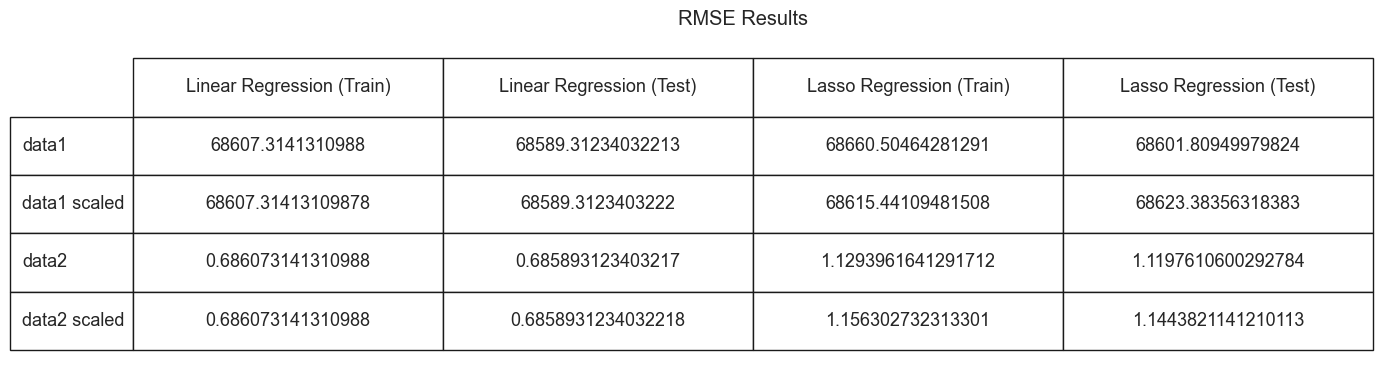

In [47]:
fig, ax = plt.subplots(figsize=(8, 4))
# hide axes
# fig.patch.set_visible(False)
ax.axis("off")
ax.axis("tight")
ax.margins(x=0, y=0)
table = ax.table(
    cellText=results,
    rowLabels=row_labels,
    colLabels=col_labels,
    loc="center",
    cellLoc="center",
)
# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(13)
fig.suptitle("RMSE Results")

# Adjust cell heights and widths
table.scale(2, 3.5)
save_fig("d2", tight_layout=False, bbox_inches="tight", pad_inches=0.1)
plt.show()

## D3